In [3]:
import numpy as np
from scipy.integrate import odeint #differntial equation solver module
import matplotlib.pyplot as plt

In [12]:
# Total population, N
N = 1000

# Initial number of infected, I0 
I0=1

#Initial recovered individuals, R0
R0 = 0

# people initially susceptiable to infection, 
#S0 (everyone not recoverd or infected)
S0 = N - I0 - R0

#Number of inital people dead, D0
D0=0

# Contact rate, beta 
beta=0.8

#mean recovery rate, gamma (in 1/days)
gamma = 1./10

#death rate (in 1/person)
mu = 0

# A grid of time points (in days)
t = np.linspace(0, 200, 200)

In [13]:
# The SIR model differential equations
def ode(y, t, N, beta, gamma,miu):
    S, I, R, D = y
    dS = -beta * S * I / N
    dI = (beta * S * I / N) - (gamma * I)
    dR = (gamma * I)-mu*I
    dD=mu*I
    return dS, dI, dR,dD

In [14]:
# Initial conditions vector
y0 = S0, I0, R0, D0
# Integrate the SIR equations over the time grid, t
der = odeint(ode, y0, t, args=(N, beta, gamma,mu))
S, I, R, D = der.T

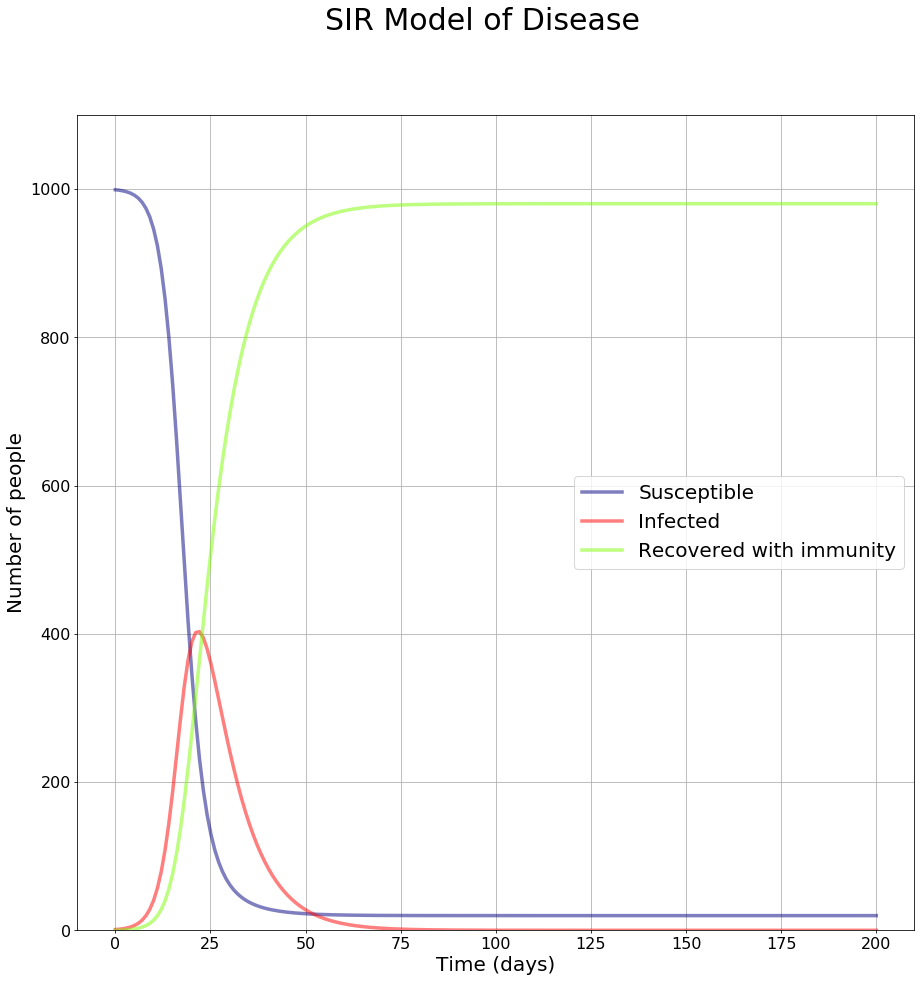

<Figure size 432x288 with 0 Axes>

In [15]:
fig = plt.figure(facecolor='w', figsize=(15,15))
fig.suptitle('SIR Model of Disease', fontsize=30)


ax = fig.add_subplot(111, axisbelow=True)
ax.plot(t, S, 'navy',label='Susceptible',alpha=0.5,lw=3.5 )
ax.plot(t, I, 'r', label='Infected',alpha=0.5,lw=3.5,)
ax.plot(t, R, 'lawngreen', label='Recovered with immunity',alpha=0.5,lw=3.5,)
#ax.plot(t, D, 'black', label='Dead', alpha=0.7,lw=3.5,)
ax.set_xlabel('Time (days)', fontsize=20 )
ax.set_ylabel('Number of people', fontsize=20 )
ax.set_ylim(0,1100)
ax.yaxis.set_tick_params(length=3, labelsize=16)
ax.xaxis.set_tick_params(length=3, labelsize=16)
ax.grid(b=True)
legend = ax.legend(fontsize=20)

plt.show()
plt.savefig('SIR.png')